<a href="https://colab.research.google.com/github/sp2316/AJAX_mars_rover_api-fetch/blob/main/PALIVELA_SAIPRASAD_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Colab_Notebooks/ML Project/notebook')
print(os.getcwd())

/content
/content/drive/MyDrive/Colab_Notebooks/ML Project/notebook


In [3]:
import os
import random
import math
import shutil
import glob
import pandas as pd
import warnings
from keras import backend as K
warnings.filterwarnings("ignore")

## 1. Transfer Learning for Image Classification


### Data Exploration and Pre-processing


#### d.i Images in each class are given in separate folders in the folder Sport Images. We have several hundreds of images for five classes of sport activities, namely baseball, basketball, fencing, tennis, and volleyball.

#### d.ii Randomly select [0.7ni] images from each folder as your training set, [0.15ni] as validation set, and the rest as your test set, where ni is the number of images in folder i and /x/ is the ceiling of x

In [4]:
# import shutil

train_dir = "../Data/train/"
val_dir = "../Data/val/"
test_dir = "../Data/test/"

shutil.rmtree(train_dir)
shutil.rmtree(val_dir)
shutil.rmtree(test_dir)



In [5]:
train_X = list()
valid_X = []
test_X = []
train_Y =[]
valid_Y =[]
test_Y = []
train_classes = []
test_classes = []


classes= ["baseball", "basketball", "fencing", "tennis", "volleyball"]

In [6]:
for folder in classes:

  files = glob.glob('../Data/Sport_Images/'+folder+'/*.jpg')
  
  num_train = math.ceil(0.7*len(files))
  temp_train = random.sample(files,k=num_train)
  train_X.extend(temp_train)
  train_Y.extend([folder.split('.')[-1]]*num_train)
  train_classes.extend([folder.split('.')[-1]]*num_train)

  num_valid = math.ceil(0.15*len(files))
  temp_valid = []
  for file in files:
    if file not in temp_train:
      temp_valid.append(file)
  temp_valid = random.sample(temp_valid, k = num_valid)
  valid_X.extend(temp_valid)
  valid_Y.extend([folder.split('.')[-1]]*num_valid)


  temp_test = []
  for file in files:
    if file not in temp_train:
      if file not in temp_valid:
        temp_test.append(file)
  test_X.extend(temp_test)
  test_Y.extend([folder.split('.')[-1]]*len(temp_test))
  test_classes.extend([folder.split('.')[-1]]*len(temp_test))




In [7]:
i=0
for file in train_X:
       src_path = file
       dst_path = os.path.join(train_dir, file.split('/')[-2])
       i+=1
       #print(i)
       os.makedirs(dst_path, exist_ok=True)  # create the folder if it doesn't exist
       shutil.copy(src_path, os.path.join(dst_path,file.split('/')[-1]))
     
i=0
for file in test_X:
       src_path = file
       dst_path = test_dir+'/'+file.split('/')[-2]
       os.makedirs(dst_path, exist_ok=True) 
       #print('testing ',i)
       i+=1
       shutil.copy(src_path, os.path.join(dst_path,file.split('/')[-1]))
i=0
for file in valid_X:
         src_path = file
         dst_path = val_dir+'/'+file.split('/')[-2]
         os.makedirs(dst_path, exist_ok=True) 
         #print('validation ',i)
         i+=1
         shutil.copy(src_path, os.path.join(dst_path,file.split('/')[-1]))

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training target variable
label_encoder.fit(train_Y)

# Encode the training target variable with numeric labels
train_Y_encoded = label_encoder.transform(train_Y)

# Encode the test target variable with numeric labels
test_Y_encoded = label_encoder.transform(test_Y)

# Encode the validation target variable with numeric labels
valid_Y_encoded = label_encoder.transform(valid_Y)

print(train_Y_encoded)
print(test_Y_encoded)
print(valid_Y_encoded)


[0 0 0 ... 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
train_Y = pd.get_dummies(train_Y).values
valid_Y = pd.get_dummies(valid_Y).values
test_Y = pd.get_dummies(test_Y).values

print('Training set length is',str(len(train_X)))
print('Validation set length is',str(len(valid_X)))
print('Test set length is',str(len(test_X)))
# print(valid_Y)

Training set length is 2008
Validation set length is 433
Test set length is 425


#### d.iii In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV.


In [10]:
import cv2,numpy as np

#resizing the images, zero-pad to same size
def make_same_size(images):
  res = []
  for image_file in images:
    image = cv2.imread(image_file)
    new_img = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA) #as we are changing only size
    res.append(new_img)
  return np.array(res)
print('Starting resizing train data')

train_X = make_same_size(train_X)
print('Finished!')
print('Size of randomly selected training data image')
print(train_X[random.randrange(len(train_X))].shape)
print()

print('Starting resizing validation data')
valid_X = make_same_size(valid_X)
print('Finished!')
print('Size of randomly selected validation data image')
print(valid_X[random.randrange(len(valid_X))].shape)
print()

print('Starting resizing test data')
test_X = make_same_size(test_X)
print('Finished!')
print('Size of randomly selected test data image')
print(test_X[random.randrange(len(test_X))].shape)
print()

Starting resizing train data
Finished!
Size of randomly selected training data image
(224, 224, 3)

Starting resizing validation data
Finished!
Size of randomly selected validation data image
(224, 224, 3)

Starting resizing test data
Finished!
Size of randomly selected test data image
(224, 224, 3)



### (e) Transfer Learning for Image Classification


In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras import layers 

#### i. When dealing with classification of relatively small image datasets, deep networks may not perform very well because of not having enough data to train them. In such cases, one usually uses transfer learning, which uses deep learning models that are trained on very large datasets such as ImageNet as feature extractors. The idea is that such deep networks have learned to extract meaningful features from an image using their layers, and those features can be used in learning other tasks. In order to do that, usually the last layer or the last few layers of the pre-trained network are removed, and the response of the layer before the removed layers to the images in the new dataset is used

In [12]:
#creating a blunt model of EfficientNetB0 from weights 'imagenet'
shape = train_X[random.randrange(len(train_X))].shape
b0 = EfficientNetB0(weights = 'imagenet', include_top = False, input_shape = shape)
b0.trainable = False
model = Sequential(
    [
        b0,
        layers.GlobalMaxPooling2D(),
        layers.Dense(5, activation = 'softmax')
    ], name = 'blunt_b0'
)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X, train_Y, epochs = 5)
print('The Model was trained just for 5 epochs to see the result benchmark')
K.clear_session()

16705208/16705208 [==============================] - 2s 0us/step
Model: "blunt_b0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 6,405
Non-trainable params: 4,049,571
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 16s 17ms/step - loss: 1.2339 - accuracy: 0.6624
Epoch 2/5
63/63 [==============================] - 1s 16ms/step - loss: 0.4404

In [13]:
#creating blunt model of VGG16 from weights 'imagenet'
shape = train_X[random.randrange(len(train_X))].shape
vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = shape)
vgg.trainable = False
model = Sequential(
    [
        vgg,
        layers.GlobalMaxPooling2D(),
        layers.Dense(5, activation = 'softmax')
    ], name = 'blunt_vgg'
)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X, train_Y, epochs = 5)
print('The model underwent only 5 epochs to evaluate the performance benchmark.')
K.clear_session()

58889256/58889256 [==============================] - 4s 0us/step
Model: "blunt_vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 4s 32ms/step - loss: 35.0205 - accuracy: 0.3466
Epoch 2/5
63/63 [==============================] - 1s 20ms/step - loss: 12.

In [14]:
#creating blunt model of ResNet50 from weights 'imagenet'
shape = train_X[random.randrange(len(train_X))].shape
rn = ResNet50(weights = 'imagenet', include_top = False, input_shape = shape)
rn.trainable = False
model = Sequential(
    [
        rn,
        layers.GlobalMaxPooling2D(),
        layers.Dense(5, activation = 'softmax')
    ], name = 'blunt_resnet'
)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X, train_Y, epochs = 5)
print('The model underwent only 5 epochs just to evaluate the performance benchmark.')
K.clear_session()

94765736/94765736 [==============================] - 5s 0us/step
Model: "blunt_resnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/5
63/63 [==============================] - 5s 21ms/step - loss: 2.7861 - accuracy: 0.6419
Epoch 2/5
63/63 [==============================] - 1s 16ms/step - loss: 

#### ii. To perform empirical regularization, crop, randomly zoom, rotate, flip, contrast, and translate images in your training set for image augmentation. You can use various tools to do this, including OpenCV.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating the augmentation process which will be fed as inputs to following models
augment_ = Sequential(
    [
        layers.RandomCrop(height = 300, width = 300),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        layers.RandomRotation(factor = 0.2),
        layers.RandomFlip(),
        layers.RandomContrast(factor = 0.15),
        layers.RandomTranslation(height_factor=0.2,width_factor=0.2)
    ],
    name = 'augment'
)

input = augment_(layers.Input(shape = shape))



**iii. Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable.**

In [16]:
# For EfficientNetB0
dropout_rate = 0.20

eff_b0 = EfficientNetB0(weights = 'imagenet', include_top = False, input_tensor = input)
eff_b0.trainable = False

model = Sequential(
    [
        eff_b0,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(dropout_rate , name = 'dropout'),
        layers.Dense(5, activation = 'relu', name = 'relu'),
        layers.Dense(5, activation = 'softmax', name = 'softmax')
    ], name = 'Efficient_Net_B0'
)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X,train_Y, batch_size = 5,epochs = 5)
K.clear_session()

Model: "Efficient_Net_B0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 10, 10, 1280)     4049571   
                                                                 
 pooling (GlobalAveragePooli  (None, 1280)             0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 1280)             5120      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 relu (Dense)                (None, 5)                 6405      
                                                                 
 softmax (Dense)             (None, 5)            

In [17]:
# For VGG16
dropout_rate = 0.20
input = augment_(layers.Input(shape = shape))

VGG16_ = VGG16(weights = 'imagenet', include_top = False, input_tensor = input)

VGG16_.trainable = False

model = Sequential(
    [
        VGG16_,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(dropout_rate , name = 'dropout'),
        layers.Dense(5, activation = 'relu', name = 'relu'),
        layers.Dense(5, activation = 'softmax', name = 'softmax')
    ], name = 'VGG16_'
)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X, train_Y, batch_size = 5,epochs = 5)
K.clear_session()

Model: "VGG16_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 pooling (GlobalAveragePooli  (None, 512)              0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 512)              2048      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 relu (Dense)                (None, 5)                 2565      
                                                                 
 softmax (Dense)             (None, 5)                 30   

In [18]:
# For ResNet50
dropout_rate = 0.20

resNet = ResNet50(weights = 'imagenet', include_top = False, input_tensor = input)
resNet.trainable = False

model = Sequential(
    [
        resNet,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(dropout_rate , name = 'dropout'),
        layers.Dense(5, activation = 'relu', name = 'relu'),
        layers.Dense(5, activation = 'softmax', name = 'softmax')
    ], name = 'resNet'
)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(train_X, train_Y, batch_size = 5,epochs = 5)
K.clear_session()

Model: "resNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 pooling (GlobalAveragePooli  (None, 2048)             0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 2048)             8192      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 relu (Dense)                (None, 5)                 10245     
                                                                 
 softmax (Dense)             (None, 5)                 30   

**iv. Train the networks ResNet50,EfficientNetB0, and VGG16 for at least 50 epochs (preferably 100 epochs) and perform early stopping using the validation set. Keep the network parameters that have the lowest validation error.Plot the training and validation errors vs. epochs.**

In [19]:
# For EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

b0_100 = EfficientNetB0(weights = 'imagenet', include_top = False, input_tensor = input)
b0_100.trainable = False

stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max',patience = 5, restore_best_weights = True)

model_b0 = Sequential(
    [
        b0_100,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(0.20 , name = 'dropout'),
        layers.Dense(5, activation = 'relu', name = 'relu'),
        layers.Dense(5, activation = 'softmax', name = 'softmax')
    ], name = 'EfficientNetB0'
)

model_b0.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_b0.summary()
history = model_b0.fit(train_X, train_Y, epochs = 100,batch_size=15, callbacks = [stopping], validation_data = (valid_X,valid_Y))

Model: "EfficientNetB0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 10, 10, 1280)     4049571   
                                                                 
 pooling (GlobalAveragePooli  (None, 1280)             0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 1280)             5120      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 relu (Dense)                (None, 5)                 6405      
                                                                 
 softmax (Dense)             (None, 5)              

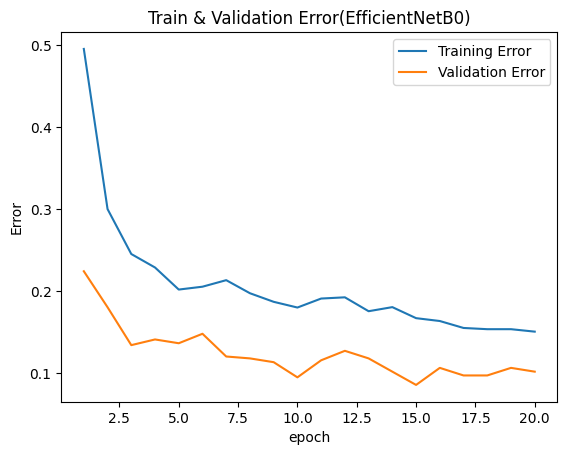

In [20]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_error = []
validation_error = []
for i in train_accuracy:
  train_error.append(1-i)
for i in validation_accuracy:
  validation_error.append(1-i)

plt.plot(range(1,len(train_accuracy)+1),train_error)
plt.plot(range(1,len(train_accuracy)+1),validation_error)
plt.title('Train & Validation Error(EfficientNetB0)')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend(['Training Error', 'Validation Error'])
plt.show()

In [21]:
#Checking on training data
result_b0_tr = model_b0.evaluate(train_X,train_Y)
print('Training error on EfficientNetB0 is',result_b0_tr)

#Checking on Validation data
result_b0_val = model_b0.evaluate(valid_X,valid_Y)
print('Validation error on EfficientNetB0 is',result_b0_val)

#Checking on testing data
result_b0 = model_b0.evaluate(test_X,test_Y)
print('Testing error on EfficientNetB0 is',result_b0)

63/63 [==============================] - 2s 23ms/step - loss: 0.1862 - accuracy: 0.9402
Training error on EfficientNetB0 is [0.186225026845932, 0.9402390718460083]
14/14 [==============================] - 0s 24ms/step - loss: 0.2707 - accuracy: 0.9145
Validation error on EfficientNetB0 is [0.27071529626846313, 0.9145496487617493]
14/14 [==============================] - 0s 24ms/step - loss: 0.2511 - accuracy: 0.9129
Testing error on EfficientNetB0 is [0.2511172890663147, 0.9129411578178406]


In [22]:
# For VGG16
import tensorflow as tf

last_layer_nodes = 5
dropout_rate = 0.20
optimizer = 'adam'

final_vgg = VGG16(weights = 'imagenet', include_top = False, input_tensor = input)
final_vgg.trainable = False

stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max',patience = 5, restore_best_weights = True)

model_vgg = Sequential(
    [
        final_vgg,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(dropout_rate , name = 'dropout'),
        layers.Dense(last_layer_nodes, activation = 'relu', name = 'relu'),
        layers.Dense(last_layer_nodes, activation = 'softmax', name = 'softmax')
    ], name = 'final_vgg'
)

model_vgg.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_vgg.summary()
history = model_vgg.fit(train_X, train_Y, epochs = 100, batch_size =15, callbacks = [stopping], validation_data = (valid_X,valid_Y))

Model: "final_vgg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 pooling (GlobalAveragePooli  (None, 512)              0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 512)              2048      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 relu (Dense)                (None, 5)                 2565      
                                                                 
 softmax (Dense)             (None, 5)                 30

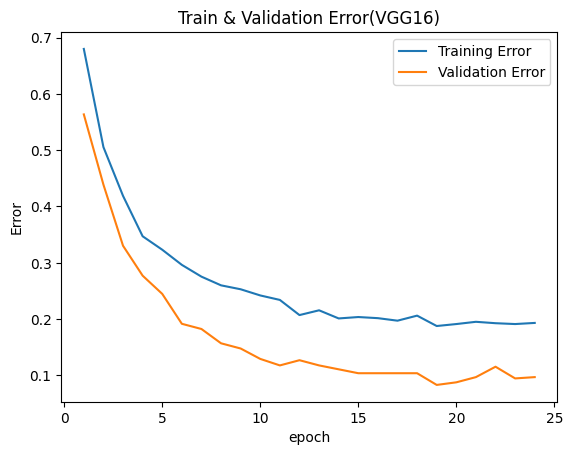

In [23]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_error = []
validation_error = []
for i in train_accuracy:
  train_error.append(1-i)
for i in validation_accuracy:
  validation_error.append(1-i)

plt.plot(range(1,len(train_accuracy)+1),train_error)
plt.plot(range(1,len(train_accuracy)+1),validation_error)
plt.title('Train & Validation Error(VGG16)')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend(['Training Error', 'Validation Error'])
plt.show()

In [24]:
#Checking on training data
result_model_vgg_tr = model_vgg.evaluate(train_X,train_Y)
print('Training error on VGG16 is',result_model_vgg_tr)

#Checking on validation data
result_model_vgg_val = model_vgg.evaluate(valid_X,valid_Y)
print('Validation error on VGG16 is',result_model_vgg_val)

#Checking on testing data
result_model_vgg_te = model_vgg.evaluate(test_X,test_Y)
print('Testing error on VGG16 is',result_model_vgg_te)

63/63 [==============================] - 5s 50ms/step - loss: 0.2115 - accuracy: 0.9258
Training error on VGG16 is [0.21153409779071808, 0.9257968068122864]
14/14 [==============================] - 1s 90ms/step - loss: 0.2912 - accuracy: 0.9145
Validation error on VGG16 is [0.29123973846435547, 0.9145496487617493]
14/14 [==============================] - 1s 69ms/step - loss: 0.2715 - accuracy: 0.9035
Testing error on VGG16 is [0.27145689725875854, 0.9035294055938721]


In [25]:
# For ResNet50

ResNet50_100 = ResNet50(weights = 'imagenet', include_top = False, input_tensor = input)
ResNet50_100.trainable = False

stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max',patience = 5, restore_best_weights = True)

model_ResNet50 = Sequential(
    [
        ResNet50_100,
        layers.GlobalAveragePooling2D(name = 'pooling'),
        layers.BatchNormalization(name = 'normalization'),
        layers.Dropout(0.20 , name = 'dropout'),
        layers.Dense(5, activation = 'relu', name = 'relu'),
        layers.Dense(5, activation = 'softmax', name = 'softmax')
    ], name = 'ResNet50'
)

model_ResNet50.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_ResNet50.summary()
history = model_ResNet50.fit(train_X, train_Y, epochs = 100,batch_size=15, callbacks = [stopping], validation_data = (valid_X,valid_Y))

Model: "ResNet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 pooling (GlobalAveragePooli  (None, 2048)             0         
 ng2D)                                                           
                                                                 
 normalization (BatchNormali  (None, 2048)             8192      
 zation)                                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 relu (Dense)                (None, 5)                 10245     
                                                                 
 softmax (Dense)             (None, 5)                 30 

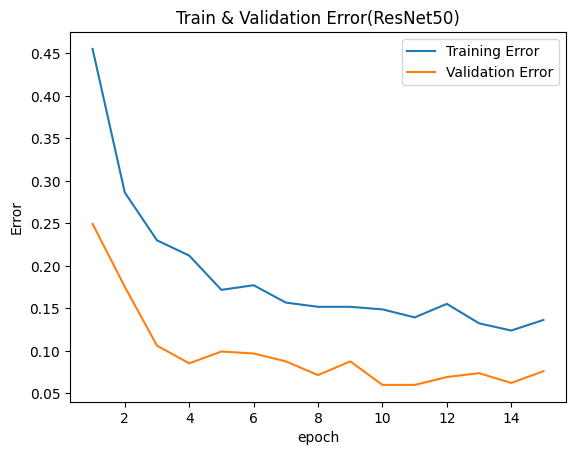

In [26]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_error = []
validation_error = []
for i in train_accuracy:
  train_error.append(1-i)
for i in validation_accuracy:
  validation_error.append(1-i)

plt.plot(range(1,len(train_accuracy)+1),train_error)
plt.plot(range(1,len(train_accuracy)+1),validation_error)
plt.title('Train & Validation Error(ResNet50)')
plt.xlabel('epoch')
plt.ylabel('Error')
plt.legend(['Training Error', 'Validation Error'])
plt.show()

In [27]:
#Checking on training data
result_ResNet_tr = model_ResNet50.evaluate(train_X,train_Y)
print('Training error on EfficientNetB0 is',result_ResNet_tr)

#Checking on validation data
result_ResNet_val = model_ResNet50.evaluate(valid_X,valid_Y)
print('Validation error on EfficientNetB0 is',result_ResNet_val)

#Checking on testing data
result_ResNet_te = model_ResNet50.evaluate(test_X,test_Y)
print('Testing error on EfficientNetB0 is',result_ResNet_te)

63/63 [==============================] - 3s 32ms/step - loss: 0.1515 - accuracy: 0.9487
Training error on EfficientNetB0 is [0.15153765678405762, 0.9487051963806152]
14/14 [==============================] - 1s 56ms/step - loss: 0.2166 - accuracy: 0.9400
Validation error on EfficientNetB0 is [0.2165764570236206, 0.9399538040161133]
14/14 [==============================] - 1s 45ms/step - loss: 0.1905 - accuracy: 0.9318
Testing error on EfficientNetB0 is [0.19054573774337769, 0.9317647218704224]


#### **v. Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on both training and test sets. Remember that this is a multi-class classification problem.**

In [28]:
test_predictions = model_b0.predict(test_X)
train_predictions = model_b0.predict(train_X)

63/63 [==============================] - 1s 21ms/step


In [29]:
table = []
table.append(['Model Type','Test Precision', 'Test Recall', 'Test F1', 'Training Precision', 'Training Recall', 'Training F1'])

In [30]:
#Calculating Train, Test precision, recall and F1 for EfficientNetB0
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

values = []
test = test_predictions.argmax(axis=-1)
train = train_predictions.argmax(axis=-1)
classes_test = pd.Categorical(test_classes).codes
classes_train = pd.Categorical(train_classes).codes
values.append('EfficientNetB0')
values.append(precision_score(classes_test, test, average='macro'))
values.append(recall_score(classes_test, test, average='macro'))
values.append(f1_score(classes_test, test, average='macro'))
values.append(precision_score(classes_train, train, average='macro'))
values.append(recall_score(classes_train, train, average='macro'))
values.append(f1_score(classes_train, train, average='macro'))
table.append(values)

In [31]:
#Test and Train predictions on VGG16 model
test_predictions = model_vgg.predict(test_X)
train_predictions = model_vgg.predict(train_X)

63/63 [==============================] - 2s 32ms/step


In [32]:
#Calculating Train, Test precision, recall and F1 for VGG16

values = []
test = test_predictions.argmax(axis=-1)
train = train_predictions.argmax(axis=-1)
classes_test = pd.Categorical(test_classes).codes
classes_train = pd.Categorical(train_classes).codes
values.append('VGG16')
values.append(precision_score(classes_test, test, average='macro'))
values.append(recall_score(classes_test, test, average='macro'))
values.append(f1_score(classes_test, test, average='macro'))
values.append(precision_score(classes_train, train, average='macro'))
values.append(recall_score(classes_train, train, average='macro'))
values.append(f1_score(classes_train, train, average='macro'))
table.append(values)

In [33]:
#Test and Train predictions on ResNet50 model
test_predictions = model_ResNet50.predict(test_X)
train_predictions = model_ResNet50.predict(train_X)

63/63 [==============================] - 1s 22ms/step


In [34]:
#Calculating Train, Test precision, recall and F1 for ResNet50

values = []
test = test_predictions.argmax(axis=-1)
train = train_predictions.argmax(axis=-1)
classes_test = pd.Categorical(test_classes).codes
classes_train = pd.Categorical(train_classes).codes
values.append('ResNet50')
values.append(precision_score(classes_test, test, average='macro'))
values.append(recall_score(classes_test, test, average='macro'))
values.append(f1_score(classes_test, test, average='macro'))
values.append(precision_score(classes_train, train, average='macro'))
values.append(recall_score(classes_train, train, average='macro'))
values.append(f1_score(classes_train, train, average='macro'))
table.append(values)

In [35]:
from tabulate import tabulate

#Consolidated result
print('Consolidated result\n\n')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Consolidated result


╒════════════════╤══════════════════╤═══════════════╤═══════════╤══════════════════════╤═══════════════════╤═══════════════╕
│ Model Type     │   Test Precision │   Test Recall │   Test F1 │   Training Precision │   Training Recall │   Training F1 │
╞════════════════╪══════════════════╪═══════════════╪═══════════╪══════════════════════╪═══════════════════╪═══════════════╡
│ EfficientNetB0 │         0.916785 │      0.911345 │  0.91312  │             0.94192  │          0.939769 │      0.94066  │
├────────────────┼──────────────────┼───────────────┼───────────┼──────────────────────┼───────────────────┼───────────────┤
│ VGG16          │         0.906766 │      0.904015 │  0.904206 │             0.928641 │          0.925018 │      0.926378 │
├────────────────┼──────────────────┼───────────────┼───────────┼──────────────────────┼───────────────────┼───────────────┤
│ ResNet50       │         0.932493 │      0.92934  │  0.930215 │             0.950459 │          0.948

###  **f. Video Classification Using Moving Averages**


#### **i. In order to have a better deep learner, reuse the validation and test data and train the network, without seriously overfitting it. In the lectures, we saw how this can be done.**

In [36]:
# Concatenate the training, validation, and test data 
combined_X = np.concatenate((train_X, valid_X, test_X), axis=0)
combined_Y = np.concatenate((train_Y, valid_Y, test_Y), axis=0)


# Train the ResNet50 model with combined data since it has highest accuracy
history_resnet = model_ResNet50.fit(
    combined_X, combined_Y,
    epochs=100,
    batch_size=15,
    callbacks=[stopping],
    validation_data=(valid_X, valid_Y)
)


Epoch 1/100
192/192 [==============================] - 5s 27ms/step - loss: 0.4443 - accuracy: 0.8419 - val_loss: 0.2317 - val_accuracy: 0.9376
Epoch 2/100
192/192 [==============================] - 4s 23ms/step - loss: 0.4493 - accuracy: 0.8475 - val_loss: 0.2099 - val_accuracy: 0.9400
Epoch 3/100
192/192 [==============================] - 4s 23ms/step - loss: 0.4381 - accuracy: 0.8412 - val_loss: 0.1764 - val_accuracy: 0.9492
Epoch 4/100
192/192 [==============================] - 4s 22ms/step - loss: 0.4151 - accuracy: 0.8493 - val_loss: 0.1876 - val_accuracy: 0.9446
Epoch 5/100
192/192 [==============================] - 4s 23ms/step - loss: 0.4283 - accuracy: 0.8535 - val_loss: 0.1799 - val_accuracy: 0.9446
Epoch 6/100
192/192 [==============================] - 4s 23ms/step - loss: 0.3839 - accuracy: 0.8597 - val_loss: 0.2056 - val_accuracy: 0.9400
Epoch 7/100
192/192 [==============================] - 4s 22ms/step - loss: 0.4085 - accuracy: 0.8608 - val_loss: 0.1850 - val_accuracy:

In [37]:
# Train the VGG16 model with combined data 
history_vgg = model_vgg.fit(
    combined_X, combined_Y,
    epochs=100,
    batch_size=15,
    callbacks=[stopping],
    validation_data=(valid_X, valid_Y)
)

# Train the EfficientNetB0 model with combined data 
history_b0 = model_b0.fit(
    combined_X, combined_Y,
    epochs=100,
    batch_size=15,
    callbacks=[stopping],
    validation_data=(valid_X, valid_Y)
)


Epoch 1/100
192/192 [==============================] - 5s 26ms/step - loss: 0.5327 - accuracy: 0.8067 - val_loss: 0.2671 - val_accuracy: 0.9076
Epoch 2/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5440 - accuracy: 0.7983 - val_loss: 0.2430 - val_accuracy: 0.9238
Epoch 3/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5500 - accuracy: 0.7983 - val_loss: 0.2512 - val_accuracy: 0.9145
Epoch 4/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5394 - accuracy: 0.8067 - val_loss: 0.2426 - val_accuracy: 0.9122
Epoch 5/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5563 - accuracy: 0.8057 - val_loss: 0.2294 - val_accuracy: 0.9169
Epoch 6/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5444 - accuracy: 0.8039 - val_loss: 0.2226 - val_accuracy: 0.9169
Epoch 7/100
192/192 [==============================] - 5s 24ms/step - loss: 0.5274 - accuracy: 0.8039 - val_loss: 0.2170 - val_accuracy:

#### **ii. Apply at least L equally spaced frames of each video in the folder Sport Videos to your model to obtain L vectors of probability predictions from the softmax in your model. You must choose L to be at least 100, but you are welcome to use all the frames in each video. Calculate the average p of these probability vectors for each video.**

#### **iii.Select the class with maximum probability in the vector p for each video and compare it to the actual label of the video.**

#### **iv. Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on the test data, i.e. videos. Remember that this is a multi-classclassification problem.**

#### **RESNET**

In [38]:
NUM_FRAMES = 100
average_probs = []
def predict_video(video_path):
    # Open the video and get its properties   
    video = cv2.VideoCapture (video_path)
    
    fps = video.get (cv2.CAP_PROP_FPS)
    num_frames_video = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the frames to extract
    frame_idxs = np.linspace(0, num_frames_video-1, NUM_FRAMES, dtype=int)

    # Create a list to store the probability vectors for each frame
    frame_probs = []

    # Loop over the frames to extract and apply the model
    for cnt, frame_idx in enumerate(frame_idxs):
      # Extract the frame
      video.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
      ret, frame = video.read()
     
      if not ret:
         continue

      # Preprocessing the frame
      frame = cv2.resize(frame, (224, 224))
      frame = cv2.cvtColor (frame, cv2.COLOR_BGR2RGB)

      # Apply the model and get the probability vector
      probs = model_ResNet50.predict(np.expand_dims(frame, axis=0),verbose=0)
      frame_probs.append(probs)
    
    average_prob = np.mean(frame_probs, axis=0)
    # Store the average probability vector for the video
    max_index = np.argmax(average_prob)
    average_probs.append(max_index)


    print(max_index)

    return max_index



In [39]:
from tqdm import tqdm
videos_folder = "../Data/Sport_Videos/"
y_true = []
y_pred_res = []
paths = []

video_list_dir =['BaseballPitch','Basketball','Fencing','TennisSwing','VolleyballSpiking']
for ind,video_file in enumerate(video_list_dir):
  video_paths = [os.path.join(videos_folder,video_file, file_name) for file_name in os.listdir(os.path.join(videos_folder,video_file))]
 
  for path in tqdm(video_paths):
      prediction = predict_video(path)
      y_true.append(ind)
      y_pred_res.append(prediction)
      

  1%|          | 1/150 [00:06<17:13,  6.93s/it]

0


  1%|▏         | 2/150 [00:14<17:48,  7.22s/it]

0


  2%|▏         | 3/150 [00:21<17:16,  7.05s/it]

0


  3%|▎         | 4/150 [00:28<17:00,  6.99s/it]

0


  3%|▎         | 5/150 [00:34<16:14,  6.72s/it]

0


  4%|▍         | 6/150 [00:40<15:50,  6.60s/it]

0


  5%|▍         | 7/150 [00:47<15:30,  6.50s/it]

0


  5%|▌         | 8/150 [00:53<15:14,  6.44s/it]

0


  6%|▌         | 9/150 [00:59<15:02,  6.40s/it]

0


  7%|▋         | 10/150 [01:06<15:15,  6.54s/it]

0


  7%|▋         | 11/150 [01:12<14:57,  6.46s/it]

0


  8%|▊         | 12/150 [01:19<14:46,  6.42s/it]

0


  9%|▊         | 13/150 [01:25<14:33,  6.38s/it]

2


  9%|▉         | 14/150 [01:31<14:25,  6.36s/it]

2


 10%|█         | 15/150 [01:38<14:41,  6.53s/it]

2


 11%|█         | 16/150 [01:44<14:24,  6.45s/it]

4


 11%|█▏        | 17/150 [01:51<14:14,  6.42s/it]

2


 12%|█▏        | 18/150 [01:57<14:06,  6.41s/it]

2


 13%|█▎        | 19/150 [02:04<13:58,  6.40s/it]

2


 13%|█▎        | 20/150 [02:10<13:52,  6.40s/it]

2


 14%|█▍        | 21/150 [02:17<14:04,  6.54s/it]

2


 15%|█▍        | 22/150 [02:24<14:38,  6.87s/it]

2


 15%|█▌        | 23/150 [02:32<14:48,  7.00s/it]

0


 16%|█▌        | 24/150 [02:39<14:40,  6.98s/it]

0


 17%|█▋        | 25/150 [02:45<14:10,  6.81s/it]

0


 17%|█▋        | 26/150 [02:52<14:07,  6.84s/it]

2


 18%|█▊        | 27/150 [02:58<13:43,  6.70s/it]

0


 19%|█▊        | 28/150 [03:05<13:38,  6.71s/it]

0


 19%|█▉        | 29/150 [03:12<13:22,  6.63s/it]

0


 20%|██        | 30/150 [03:18<13:06,  6.55s/it]

0


 21%|██        | 31/150 [03:24<12:51,  6.48s/it]

0


 21%|██▏       | 32/150 [03:31<12:42,  6.46s/it]

0


 22%|██▏       | 33/150 [03:37<12:32,  6.43s/it]

0


 23%|██▎       | 34/150 [03:43<12:23,  6.41s/it]

0


 23%|██▎       | 35/150 [03:50<12:15,  6.39s/it]

0


 24%|██▍       | 36/150 [03:57<12:26,  6.55s/it]

0


 25%|██▍       | 37/150 [04:03<12:10,  6.47s/it]

0


 25%|██▌       | 38/150 [04:09<11:57,  6.41s/it]

0


 26%|██▌       | 39/150 [04:15<11:47,  6.37s/it]

0


 27%|██▋       | 40/150 [04:22<11:37,  6.34s/it]

0


 27%|██▋       | 41/150 [04:30<12:22,  6.81s/it]

0


 28%|██▊       | 42/150 [04:37<12:35,  7.00s/it]

0


 29%|██▊       | 43/150 [04:44<12:22,  6.94s/it]

0


 29%|██▉       | 44/150 [04:50<11:58,  6.77s/it]

0


 30%|███       | 45/150 [04:57<11:36,  6.63s/it]

0


 31%|███       | 46/150 [05:03<11:18,  6.53s/it]

0


 31%|███▏      | 47/150 [05:09<11:05,  6.46s/it]

0


 32%|███▏      | 48/150 [05:16<11:21,  6.69s/it]

0


 33%|███▎      | 49/150 [05:23<11:27,  6.81s/it]

0


 33%|███▎      | 50/150 [05:30<11:07,  6.67s/it]

0


 34%|███▍      | 51/150 [05:36<10:49,  6.56s/it]

0


 35%|███▍      | 52/150 [05:42<10:34,  6.47s/it]

0


 35%|███▌      | 53/150 [05:49<10:25,  6.45s/it]

0


 36%|███▌      | 54/150 [05:55<10:16,  6.42s/it]

0


 37%|███▋      | 55/150 [06:01<10:05,  6.38s/it]

0


 37%|███▋      | 56/150 [06:08<10:16,  6.55s/it]

0


 38%|███▊      | 57/150 [06:15<10:00,  6.46s/it]

0


 39%|███▊      | 58/150 [06:21<10:05,  6.58s/it]

3


 39%|███▉      | 59/150 [06:29<10:29,  6.91s/it]

3


 40%|████      | 60/150 [06:37<10:49,  7.21s/it]

4


 41%|████      | 61/150 [06:45<11:01,  7.44s/it]

3


 41%|████▏     | 62/150 [06:52<10:48,  7.36s/it]

3


 42%|████▏     | 63/150 [06:59<10:14,  7.06s/it]

0


 43%|████▎     | 64/150 [07:05<09:47,  6.83s/it]

0


 43%|████▎     | 65/150 [07:11<09:31,  6.72s/it]

0


 44%|████▍     | 66/150 [07:18<09:14,  6.60s/it]

0


 45%|████▍     | 67/150 [07:24<09:01,  6.52s/it]

0


 45%|████▌     | 68/150 [07:31<09:03,  6.63s/it]

2


 46%|████▌     | 69/150 [07:37<08:49,  6.54s/it]

2


 47%|████▋     | 70/150 [07:44<08:52,  6.66s/it]

0


 47%|████▋     | 71/150 [07:50<08:37,  6.56s/it]

2


 48%|████▊     | 72/150 [07:57<08:27,  6.51s/it]

2


 49%|████▊     | 73/150 [08:03<08:17,  6.46s/it]

2


 49%|████▉     | 74/150 [08:10<08:09,  6.44s/it]

2


 50%|█████     | 75/150 [08:16<07:59,  6.39s/it]

2


 51%|█████     | 76/150 [08:23<08:05,  6.57s/it]

2


 51%|█████▏    | 77/150 [08:29<07:53,  6.48s/it]

2


 52%|█████▏    | 78/150 [08:36<08:04,  6.73s/it]

2


 53%|█████▎    | 79/150 [08:44<08:11,  6.92s/it]

0


 53%|█████▎    | 80/150 [08:51<08:11,  7.02s/it]

0


 54%|█████▍    | 81/150 [08:58<08:07,  7.06s/it]

0


 55%|█████▍    | 82/150 [09:05<07:44,  6.84s/it]

2


 55%|█████▌    | 83/150 [09:11<07:27,  6.69s/it]

2


 56%|█████▌    | 84/150 [09:17<07:14,  6.59s/it]

0


 57%|█████▋    | 85/150 [09:24<07:03,  6.52s/it]

3


 57%|█████▋    | 86/150 [09:30<06:56,  6.50s/it]

3


 58%|█████▊    | 87/150 [09:36<06:46,  6.45s/it]

3


 59%|█████▊    | 88/150 [09:43<06:48,  6.58s/it]

3


 59%|█████▉    | 89/150 [09:50<06:36,  6.50s/it]

0


 60%|██████    | 90/150 [09:56<06:26,  6.45s/it]

3


 61%|██████    | 91/150 [10:03<06:27,  6.57s/it]

0


 61%|██████▏   | 92/150 [10:10<06:28,  6.71s/it]

0


 62%|██████▏   | 93/150 [10:16<06:15,  6.59s/it]

0


 63%|██████▎   | 94/150 [10:22<06:05,  6.53s/it]

0


 63%|██████▎   | 95/150 [10:29<05:56,  6.47s/it]

0


 64%|██████▍   | 96/150 [10:35<05:46,  6.42s/it]

0


 65%|██████▍   | 97/150 [10:43<05:56,  6.73s/it]

0


 65%|██████▌   | 98/150 [10:50<06:00,  6.94s/it]

0


 66%|██████▌   | 99/150 [10:57<05:59,  7.05s/it]

2


 67%|██████▋   | 100/150 [11:04<05:45,  6.92s/it]

0


 67%|██████▋   | 101/150 [11:10<05:30,  6.75s/it]

0


 68%|██████▊   | 102/150 [11:17<05:18,  6.63s/it]

0


 69%|██████▊   | 103/150 [11:23<05:04,  6.48s/it]

0


 69%|██████▉   | 104/150 [11:29<04:52,  6.36s/it]

2


 70%|███████   | 105/150 [11:35<04:43,  6.30s/it]

2


 71%|███████   | 106/150 [11:41<04:37,  6.31s/it]

2


 71%|███████▏  | 107/150 [11:48<04:40,  6.52s/it]

2


 72%|███████▏  | 108/150 [11:55<04:31,  6.46s/it]

4


 73%|███████▎  | 109/150 [12:01<04:21,  6.37s/it]

0


 73%|███████▎  | 110/150 [12:07<04:17,  6.44s/it]

0


 74%|███████▍  | 111/150 [12:14<04:07,  6.35s/it]

2


 75%|███████▍  | 112/150 [12:20<03:58,  6.27s/it]

0


 75%|███████▌  | 113/150 [12:26<03:50,  6.23s/it]

0


 76%|███████▌  | 114/150 [12:32<03:42,  6.19s/it]

0


 77%|███████▋  | 115/150 [12:38<03:36,  6.18s/it]

0


 77%|███████▋  | 116/150 [12:45<03:42,  6.55s/it]

0


 78%|███████▊  | 117/150 [12:53<03:46,  6.87s/it]

0


 79%|███████▊  | 118/150 [13:00<03:38,  6.83s/it]

0


 79%|███████▉  | 119/150 [13:06<03:26,  6.67s/it]

0


 80%|████████  | 120/150 [13:13<03:20,  6.67s/it]

0


 81%|████████  | 121/150 [13:19<03:08,  6.50s/it]

0


 81%|████████▏ | 122/150 [13:26<03:03,  6.56s/it]

0


 82%|████████▏ | 123/150 [13:32<02:53,  6.42s/it]

0


 83%|████████▎ | 124/150 [13:38<02:49,  6.54s/it]

0


 83%|████████▎ | 125/150 [13:45<02:40,  6.41s/it]

0


 84%|████████▍ | 126/150 [13:51<02:31,  6.32s/it]

0


 85%|████████▍ | 127/150 [13:57<02:24,  6.30s/it]

2


 85%|████████▌ | 128/150 [14:03<02:17,  6.23s/it]

0


 86%|████████▌ | 129/150 [14:09<02:10,  6.21s/it]

2


 87%|████████▋ | 130/150 [14:15<02:03,  6.17s/it]

0


 87%|████████▋ | 131/150 [14:21<01:57,  6.18s/it]

0


 88%|████████▊ | 132/150 [14:28<01:50,  6.17s/it]

4


 89%|████████▊ | 133/150 [14:34<01:47,  6.34s/it]

0


 89%|████████▉ | 134/150 [14:41<01:40,  6.30s/it]

0


 90%|█████████ | 135/150 [14:49<01:42,  6.85s/it]

0


 91%|█████████ | 136/150 [14:56<01:39,  7.10s/it]

0


 91%|█████████▏| 137/150 [15:03<01:30,  6.93s/it]

0


 92%|█████████▏| 138/150 [15:09<01:20,  6.71s/it]

0


 93%|█████████▎| 139/150 [15:16<01:13,  6.72s/it]

0


 93%|█████████▎| 140/150 [15:22<01:05,  6.53s/it]

0


 94%|█████████▍| 141/150 [15:28<00:57,  6.42s/it]

0


 95%|█████████▍| 142/150 [15:34<00:50,  6.34s/it]

0


 95%|█████████▌| 143/150 [15:41<00:45,  6.45s/it]

0


 96%|█████████▌| 144/150 [15:47<00:38,  6.36s/it]

0


 97%|█████████▋| 145/150 [15:53<00:31,  6.30s/it]

0


 97%|█████████▋| 146/150 [15:59<00:25,  6.27s/it]

0


 98%|█████████▊| 147/150 [16:06<00:18,  6.22s/it]

0


 99%|█████████▊| 148/150 [16:12<00:12,  6.22s/it]

0


 99%|█████████▉| 149/150 [16:18<00:06,  6.26s/it]

0


100%|██████████| 150/150 [16:25<00:00,  6.57s/it]


0


  1%|          | 1/137 [00:06<15:36,  6.89s/it]

4


  1%|▏         | 2/137 [00:13<15:32,  6.91s/it]

2


  2%|▏         | 3/137 [00:20<14:44,  6.60s/it]

4


  3%|▎         | 4/137 [00:27<15:34,  7.03s/it]

2


  4%|▎         | 5/137 [00:35<15:49,  7.20s/it]

2


  4%|▍         | 6/137 [00:42<15:26,  7.07s/it]

4


  5%|▌         | 7/137 [00:48<14:51,  6.86s/it]

2


  6%|▌         | 8/137 [00:54<14:24,  6.70s/it]

2


  7%|▋         | 9/137 [01:01<14:12,  6.66s/it]

2


  7%|▋         | 10/137 [01:07<13:51,  6.55s/it]

2


  8%|▊         | 11/137 [01:13<13:32,  6.45s/it]

2


  9%|▉         | 12/137 [01:20<13:12,  6.34s/it]

0


  9%|▉         | 13/137 [01:26<13:01,  6.30s/it]

2


 10%|█         | 14/137 [01:32<12:49,  6.25s/it]

2


 11%|█         | 15/137 [01:38<12:40,  6.23s/it]

0


 12%|█▏        | 16/137 [01:44<12:30,  6.20s/it]

2


 12%|█▏        | 17/137 [01:50<12:23,  6.20s/it]

0


 13%|█▎        | 18/137 [01:57<12:16,  6.19s/it]

0


 14%|█▍        | 19/137 [02:03<12:10,  6.19s/it]

2


 15%|█▍        | 20/137 [02:09<12:05,  6.20s/it]

4


 15%|█▌        | 21/137 [02:15<12:02,  6.23s/it]

2


 16%|█▌        | 22/137 [02:22<12:23,  6.46s/it]

3


 17%|█▋        | 23/137 [02:29<12:42,  6.69s/it]

4


 18%|█▊        | 24/137 [02:37<12:52,  6.84s/it]

2


 18%|█▊        | 25/137 [02:43<12:35,  6.74s/it]

3


 19%|█▉        | 26/137 [02:49<12:11,  6.59s/it]

4


 20%|█▉        | 27/137 [02:56<11:48,  6.44s/it]

0


 20%|██        | 28/137 [03:02<11:33,  6.36s/it]

3


 21%|██        | 29/137 [03:08<11:20,  6.30s/it]

3


 22%|██▏       | 30/137 [03:14<11:10,  6.27s/it]

2


 23%|██▎       | 31/137 [03:20<10:59,  6.22s/it]

2


 23%|██▎       | 32/137 [03:26<10:50,  6.20s/it]

2


 24%|██▍       | 33/137 [03:32<10:43,  6.18s/it]

2


 25%|██▍       | 34/137 [03:39<10:36,  6.18s/it]

2


 26%|██▌       | 35/137 [03:45<10:31,  6.19s/it]

3


 26%|██▋       | 36/137 [03:51<10:27,  6.21s/it]

0


 27%|██▋       | 37/137 [03:57<10:19,  6.20s/it]

2


 28%|██▊       | 38/137 [04:04<10:16,  6.23s/it]

3


 28%|██▊       | 39/137 [04:10<10:09,  6.22s/it]

2


 29%|██▉       | 40/137 [04:16<10:02,  6.21s/it]

3


 30%|██▉       | 41/137 [04:23<10:19,  6.45s/it]

3


 31%|███       | 42/137 [04:30<10:34,  6.67s/it]

3


 31%|███▏      | 43/137 [04:37<10:39,  6.80s/it]

3


 32%|███▏      | 44/137 [04:44<10:39,  6.87s/it]

3


 33%|███▎      | 45/137 [04:51<10:30,  6.86s/it]

3


 34%|███▎      | 46/137 [04:57<10:09,  6.70s/it]

3


 34%|███▍      | 47/137 [05:04<10:10,  6.79s/it]

3


 35%|███▌      | 48/137 [05:11<09:52,  6.66s/it]

3


 36%|███▌      | 49/137 [05:18<09:54,  6.75s/it]

3


 36%|███▋      | 50/137 [05:24<09:38,  6.65s/it]

3


 37%|███▋      | 51/137 [05:31<09:23,  6.55s/it]

2


 38%|███▊      | 52/137 [05:37<09:11,  6.49s/it]

3


 39%|███▊      | 53/137 [05:43<09:01,  6.44s/it]

3


 39%|███▉      | 54/137 [05:50<08:52,  6.42s/it]

3


 40%|████      | 55/137 [05:56<08:44,  6.39s/it]

2


 41%|████      | 56/137 [06:02<08:35,  6.37s/it]

2


 42%|████▏     | 57/137 [06:09<08:48,  6.60s/it]

2


 42%|████▏     | 58/137 [06:16<08:36,  6.54s/it]

2


 43%|████▎     | 59/137 [06:22<08:25,  6.48s/it]

2


 44%|████▍     | 60/137 [06:29<08:39,  6.74s/it]

4


 45%|████▍     | 61/137 [06:37<08:47,  6.93s/it]

2


 45%|████▌     | 62/137 [06:44<08:47,  7.04s/it]

4


 46%|████▌     | 63/137 [06:52<08:55,  7.24s/it]

2


 47%|████▋     | 64/137 [06:58<08:30,  7.00s/it]

0


 47%|████▋     | 65/137 [07:05<08:08,  6.79s/it]

2


 48%|████▊     | 66/137 [07:11<07:53,  6.67s/it]

0


 49%|████▉     | 67/137 [07:17<07:39,  6.57s/it]

2


 50%|████▉     | 68/137 [07:24<07:29,  6.51s/it]

3


 50%|█████     | 69/137 [07:30<07:19,  6.46s/it]

0


 51%|█████     | 70/137 [07:36<07:10,  6.42s/it]

3


 52%|█████▏    | 71/137 [07:43<07:02,  6.40s/it]

2


 53%|█████▎    | 72/137 [07:49<06:54,  6.38s/it]

2


 53%|█████▎    | 73/137 [07:55<06:48,  6.38s/it]

2


 54%|█████▍    | 74/137 [08:02<06:41,  6.37s/it]

2


 55%|█████▍    | 75/137 [08:08<06:35,  6.37s/it]

2


 55%|█████▌    | 76/137 [08:14<06:26,  6.34s/it]

3


 56%|█████▌    | 77/137 [08:21<06:20,  6.34s/it]

3


 57%|█████▋    | 78/137 [08:27<06:13,  6.32s/it]

3


 58%|█████▊    | 79/137 [08:34<06:23,  6.62s/it]

3


 58%|█████▊    | 80/137 [08:42<06:29,  6.83s/it]

3


 59%|█████▉    | 81/137 [08:50<06:47,  7.27s/it]

3


 60%|█████▉    | 82/137 [08:56<06:28,  7.06s/it]

2


 61%|██████    | 83/137 [09:03<06:18,  7.01s/it]

2


 61%|██████▏   | 84/137 [09:10<06:13,  7.04s/it]

2


 62%|██████▏   | 85/137 [09:17<05:55,  6.85s/it]

3


 63%|██████▎   | 86/137 [09:23<05:42,  6.72s/it]

2


 64%|██████▎   | 87/137 [09:30<05:39,  6.79s/it]

2


 64%|██████▍   | 88/137 [09:37<05:26,  6.67s/it]

2


 65%|██████▍   | 89/137 [09:43<05:16,  6.59s/it]

2


 66%|██████▌   | 90/137 [09:50<05:15,  6.70s/it]

2


 66%|██████▋   | 91/137 [09:56<05:02,  6.59s/it]

2


 67%|██████▋   | 92/137 [10:03<04:54,  6.54s/it]

2


 68%|██████▊   | 93/137 [10:09<04:45,  6.49s/it]

2


 69%|██████▊   | 94/137 [10:16<04:38,  6.48s/it]

2


 69%|██████▉   | 95/137 [10:22<04:33,  6.51s/it]

2


 70%|███████   | 96/137 [10:29<04:27,  6.53s/it]

2


 71%|███████   | 97/137 [10:35<04:21,  6.53s/it]

3


 72%|███████▏  | 98/137 [10:43<04:32,  7.00s/it]

2


 72%|███████▏  | 99/137 [10:52<04:41,  7.41s/it]

2


 73%|███████▎  | 100/137 [10:59<04:37,  7.50s/it]

3


 74%|███████▎  | 101/137 [11:06<04:21,  7.25s/it]

2


 74%|███████▍  | 102/137 [11:13<04:05,  7.01s/it]

3


 75%|███████▌  | 103/137 [11:19<03:52,  6.83s/it]

3


 76%|███████▌  | 104/137 [11:25<03:41,  6.72s/it]

2


 77%|███████▋  | 105/137 [11:32<03:31,  6.61s/it]

0


 77%|███████▋  | 106/137 [11:38<03:22,  6.53s/it]

3


 78%|███████▊  | 107/137 [11:44<03:14,  6.47s/it]

2


 79%|███████▉  | 108/137 [11:51<03:06,  6.44s/it]

2


 80%|███████▉  | 109/137 [11:57<02:59,  6.41s/it]

3


 80%|████████  | 110/137 [12:04<02:52,  6.39s/it]

3


 81%|████████  | 111/137 [12:10<02:45,  6.37s/it]

3


 82%|████████▏ | 112/137 [12:16<02:39,  6.38s/it]

3


 82%|████████▏ | 113/137 [12:23<02:32,  6.35s/it]

3


 83%|████████▎ | 114/137 [12:29<02:26,  6.36s/it]

3


 84%|████████▍ | 115/137 [12:35<02:19,  6.34s/it]

3


 85%|████████▍ | 116/137 [12:42<02:13,  6.34s/it]

3


 85%|████████▌ | 117/137 [12:49<02:16,  6.82s/it]

3


 86%|████████▌ | 118/137 [12:57<02:12,  7.00s/it]

3


 87%|████████▋ | 119/137 [13:04<02:04,  6.91s/it]

0


 88%|████████▊ | 120/137 [13:11<01:57,  6.94s/it]

0


 88%|████████▊ | 121/137 [13:17<01:48,  6.81s/it]

3


 89%|████████▉ | 122/137 [13:23<01:40,  6.67s/it]

2


 90%|████████▉ | 123/137 [13:30<01:34,  6.74s/it]

0


 91%|█████████ | 124/137 [13:37<01:26,  6.62s/it]

0


 91%|█████████ | 125/137 [13:43<01:18,  6.54s/it]

0


 92%|█████████▏| 126/137 [13:49<01:11,  6.47s/it]

3


 93%|█████████▎| 127/137 [13:56<01:04,  6.45s/it]

2


 93%|█████████▎| 128/137 [14:02<00:57,  6.41s/it]

3


 94%|█████████▍| 129/137 [14:08<00:51,  6.39s/it]

2


 95%|█████████▍| 130/137 [14:15<00:44,  6.38s/it]

3


 96%|█████████▌| 131/137 [14:21<00:38,  6.38s/it]

0


 96%|█████████▋| 132/137 [14:28<00:31,  6.37s/it]

0


 97%|█████████▋| 133/137 [14:34<00:25,  6.40s/it]

0


 98%|█████████▊| 134/137 [14:40<00:19,  6.38s/it]

3


 99%|█████████▊| 135/137 [14:48<00:13,  6.72s/it]

0


 99%|█████████▉| 136/137 [14:55<00:06,  6.91s/it]

3


100%|██████████| 137/137 [15:02<00:00,  6.59s/it]


3


  1%|          | 1/111 [00:07<13:02,  7.12s/it]

2


  2%|▏         | 2/111 [00:14<12:57,  7.14s/it]

2


  3%|▎         | 3/111 [00:20<12:13,  6.79s/it]

2


  4%|▎         | 4/111 [00:27<12:11,  6.84s/it]

2


  5%|▍         | 5/111 [00:33<11:47,  6.68s/it]

2


  5%|▌         | 6/111 [00:40<11:29,  6.56s/it]

2


  6%|▋         | 7/111 [00:46<11:15,  6.49s/it]

2


  7%|▋         | 8/111 [00:52<11:03,  6.44s/it]

2


  8%|▊         | 9/111 [00:59<10:54,  6.42s/it]

2


  9%|▉         | 10/111 [01:06<11:04,  6.58s/it]

2


 10%|▉         | 11/111 [01:12<10:55,  6.55s/it]

2


 11%|█         | 12/111 [01:19<10:43,  6.50s/it]

2


 12%|█▏        | 13/111 [01:25<10:32,  6.46s/it]

2


 13%|█▎        | 14/111 [01:32<10:40,  6.61s/it]

2


 14%|█▎        | 15/111 [01:38<10:26,  6.53s/it]

2


 14%|█▍        | 16/111 [01:45<10:30,  6.64s/it]

2


 15%|█▌        | 17/111 [01:53<10:50,  6.92s/it]

2


 16%|█▌        | 18/111 [02:00<10:58,  7.08s/it]

2


 17%|█▋        | 19/111 [02:07<10:48,  7.05s/it]

2


 18%|█▊        | 20/111 [02:14<10:27,  6.90s/it]

2


 19%|█▉        | 21/111 [02:20<10:04,  6.72s/it]

2


 20%|█▉        | 22/111 [02:26<09:48,  6.61s/it]

2


 21%|██        | 23/111 [02:33<09:36,  6.56s/it]

2


 22%|██▏       | 24/111 [02:39<09:25,  6.50s/it]

2


 23%|██▎       | 25/111 [02:46<09:34,  6.68s/it]

2


 23%|██▎       | 26/111 [02:53<09:18,  6.58s/it]

2


 24%|██▍       | 27/111 [02:59<09:07,  6.52s/it]

2


 25%|██▌       | 28/111 [03:05<08:56,  6.46s/it]

2


 26%|██▌       | 29/111 [03:12<09:02,  6.61s/it]

2


 27%|██▋       | 30/111 [03:19<08:47,  6.52s/it]

2


 28%|██▊       | 31/111 [03:26<08:52,  6.65s/it]

2


 29%|██▉       | 32/111 [03:32<08:38,  6.56s/it]

2


 30%|██▉       | 33/111 [03:38<08:27,  6.50s/it]

2


 31%|███       | 34/111 [03:45<08:16,  6.45s/it]

2


 32%|███▏      | 35/111 [03:51<08:09,  6.44s/it]

2


 32%|███▏      | 36/111 [03:59<08:30,  6.81s/it]

2


 33%|███▎      | 37/111 [04:06<08:40,  7.04s/it]

2


 34%|███▍      | 38/111 [04:13<08:33,  7.03s/it]

2


 35%|███▌      | 39/111 [04:20<08:29,  7.07s/it]

2


 36%|███▌      | 40/111 [04:27<08:07,  6.86s/it]

2


 37%|███▋      | 41/111 [04:33<07:50,  6.71s/it]

2


 38%|███▊      | 42/111 [04:40<07:37,  6.63s/it]

2


 39%|███▊      | 43/111 [04:46<07:24,  6.53s/it]

2


 40%|███▉      | 44/111 [04:52<07:14,  6.48s/it]

2


 41%|████      | 45/111 [04:59<07:05,  6.44s/it]

2


 41%|████▏     | 46/111 [05:05<06:58,  6.44s/it]

2


 42%|████▏     | 47/111 [05:11<06:49,  6.40s/it]

2


 43%|████▎     | 48/111 [05:18<06:42,  6.39s/it]

2


 44%|████▍     | 49/111 [05:24<06:35,  6.39s/it]

2


 45%|████▌     | 50/111 [05:31<06:40,  6.56s/it]

2


 46%|████▌     | 51/111 [05:37<06:29,  6.49s/it]

2


 47%|████▋     | 52/111 [05:44<06:21,  6.46s/it]

2


 48%|████▊     | 53/111 [05:50<06:12,  6.42s/it]

2


 49%|████▊     | 54/111 [05:56<06:04,  6.39s/it]

2


 50%|████▉     | 55/111 [06:04<06:23,  6.86s/it]

2


 50%|█████     | 56/111 [06:12<06:28,  7.05s/it]

2


 51%|█████▏    | 57/111 [06:19<06:16,  6.98s/it]

2


 52%|█████▏    | 58/111 [06:25<06:01,  6.82s/it]

2


 53%|█████▎    | 59/111 [06:32<05:47,  6.68s/it]

2


 54%|█████▍    | 60/111 [06:38<05:35,  6.57s/it]

2


 55%|█████▍    | 61/111 [06:45<05:33,  6.67s/it]

2


 56%|█████▌    | 62/111 [06:51<05:21,  6.56s/it]

2


 57%|█████▋    | 63/111 [06:57<05:12,  6.51s/it]

2


 58%|█████▊    | 64/111 [07:04<05:02,  6.44s/it]

2


 59%|█████▊    | 65/111 [07:11<05:03,  6.60s/it]

2


 59%|█████▉    | 66/111 [07:17<04:53,  6.52s/it]

2


 60%|██████    | 67/111 [07:24<04:52,  6.65s/it]

2


 61%|██████▏   | 68/111 [07:30<04:41,  6.56s/it]

2


 62%|██████▏   | 69/111 [07:37<04:32,  6.49s/it]

2


 63%|██████▎   | 70/111 [07:43<04:24,  6.46s/it]

2


 64%|██████▍   | 71/111 [07:49<04:16,  6.42s/it]

2


 65%|██████▍   | 72/111 [07:56<04:09,  6.40s/it]

2


 66%|██████▌   | 73/111 [08:02<04:02,  6.37s/it]

2


 67%|██████▋   | 74/111 [08:10<04:14,  6.87s/it]

2


 68%|██████▊   | 75/111 [08:18<04:19,  7.22s/it]

2


 68%|██████▊   | 76/111 [08:25<04:08,  7.09s/it]

2


 69%|██████▉   | 77/111 [08:31<03:54,  6.90s/it]

2


 70%|███████   | 78/111 [08:38<03:41,  6.73s/it]

2


 71%|███████   | 79/111 [08:44<03:31,  6.62s/it]

2


 72%|███████▏  | 80/111 [08:51<03:23,  6.57s/it]

0


 73%|███████▎  | 81/111 [08:57<03:15,  6.51s/it]

0


 74%|███████▍  | 82/111 [09:03<03:09,  6.52s/it]

2


 75%|███████▍  | 83/111 [09:10<03:01,  6.49s/it]

2


 76%|███████▌  | 84/111 [09:16<02:54,  6.47s/it]

2


 77%|███████▋  | 85/111 [09:23<02:47,  6.44s/it]

2


 77%|███████▋  | 86/111 [09:29<02:40,  6.43s/it]

2


 78%|███████▊  | 87/111 [09:35<02:33,  6.42s/it]

2


 79%|███████▉  | 88/111 [09:42<02:27,  6.41s/it]

2


 80%|████████  | 89/111 [09:48<02:20,  6.40s/it]

2


 81%|████████  | 90/111 [09:55<02:14,  6.38s/it]

2


 82%|████████▏ | 91/111 [10:01<02:07,  6.39s/it]

2


 83%|████████▎ | 92/111 [10:08<02:07,  6.70s/it]

2


 84%|████████▍ | 93/111 [10:16<02:07,  7.09s/it]

2


 85%|████████▍ | 94/111 [10:24<02:01,  7.15s/it]

2


 86%|████████▌ | 95/111 [10:30<01:51,  6.99s/it]

2


 86%|████████▋ | 96/111 [10:37<01:43,  6.87s/it]

2


 87%|████████▋ | 97/111 [10:43<01:34,  6.72s/it]

2


 88%|████████▊ | 98/111 [10:50<01:26,  6.64s/it]

2


 89%|████████▉ | 99/111 [10:56<01:18,  6.55s/it]

2


 90%|█████████ | 100/111 [11:02<01:11,  6.50s/it]

2


 91%|█████████ | 101/111 [11:09<01:04,  6.45s/it]

2


 92%|█████████▏| 102/111 [11:15<00:58,  6.45s/it]

2


 93%|█████████▎| 103/111 [11:22<00:51,  6.43s/it]

2


 94%|█████████▎| 104/111 [11:28<00:44,  6.42s/it]

2


 95%|█████████▍| 105/111 [11:34<00:38,  6.41s/it]

2


 95%|█████████▌| 106/111 [11:41<00:32,  6.40s/it]

2


 96%|█████████▋| 107/111 [11:47<00:25,  6.41s/it]

2


 97%|█████████▋| 108/111 [11:54<00:19,  6.41s/it]

2


 98%|█████████▊| 109/111 [12:01<00:13,  6.58s/it]

2


 99%|█████████▉| 110/111 [12:07<00:06,  6.53s/it]

2


100%|██████████| 111/111 [12:15<00:00,  6.62s/it]


2


  1%|          | 1/167 [00:08<22:09,  8.01s/it]

3


  1%|          | 2/167 [00:15<21:29,  7.82s/it]

3


  2%|▏         | 3/167 [00:22<19:36,  7.17s/it]

3


  2%|▏         | 4/167 [00:28<18:42,  6.89s/it]

3


  3%|▎         | 5/167 [00:34<18:09,  6.73s/it]

3


  4%|▎         | 6/167 [00:41<17:44,  6.61s/it]

3


  4%|▍         | 7/167 [00:47<17:21,  6.51s/it]

3


  5%|▍         | 8/167 [00:54<17:11,  6.49s/it]

3


  5%|▌         | 9/167 [01:00<16:57,  6.44s/it]

3


  6%|▌         | 10/167 [01:06<16:51,  6.44s/it]

3


  7%|▋         | 11/167 [01:13<16:40,  6.41s/it]

3


  7%|▋         | 12/167 [01:20<16:57,  6.57s/it]

3


  8%|▊         | 13/167 [01:27<17:12,  6.70s/it]

3


  8%|▊         | 14/167 [01:33<16:51,  6.61s/it]

3


  9%|▉         | 15/167 [01:39<16:34,  6.54s/it]

3


 10%|▉         | 16/167 [01:46<16:16,  6.47s/it]

3


 10%|█         | 17/167 [01:52<16:03,  6.43s/it]

3


 11%|█         | 18/167 [01:58<15:52,  6.40s/it]

3


 11%|█▏        | 19/167 [02:06<16:56,  6.87s/it]

3


 12%|█▏        | 20/167 [02:14<17:15,  7.05s/it]

3


 13%|█▎        | 21/167 [02:21<16:59,  6.98s/it]

3


 13%|█▎        | 22/167 [02:27<16:30,  6.83s/it]

3


 14%|█▍        | 23/167 [02:34<16:02,  6.68s/it]

3


 14%|█▍        | 24/167 [02:40<15:40,  6.58s/it]

3


 15%|█▍        | 25/167 [02:46<15:26,  6.52s/it]

3


 16%|█▌        | 26/167 [02:53<15:41,  6.67s/it]

3


 16%|█▌        | 27/167 [03:00<15:26,  6.62s/it]

3


 17%|█▋        | 28/167 [03:06<15:15,  6.59s/it]

3


 17%|█▋        | 29/167 [03:13<15:01,  6.53s/it]

3


 18%|█▊        | 30/167 [03:20<15:13,  6.67s/it]

3


 19%|█▊        | 31/167 [03:26<14:59,  6.61s/it]

3


 19%|█▉        | 32/167 [03:33<14:45,  6.56s/it]

3


 20%|█▉        | 33/167 [03:39<14:31,  6.50s/it]

3


 20%|██        | 34/167 [03:45<14:20,  6.47s/it]

3


 21%|██        | 35/167 [03:52<14:11,  6.45s/it]

3


 22%|██▏       | 36/167 [03:59<14:26,  6.61s/it]

3


 22%|██▏       | 37/167 [04:06<15:02,  6.94s/it]

3


 23%|██▎       | 38/167 [04:14<15:16,  7.10s/it]

3


 23%|██▎       | 39/167 [04:22<15:45,  7.39s/it]

0


 24%|██▍       | 40/167 [04:29<15:11,  7.18s/it]

3


 25%|██▍       | 41/167 [04:35<14:42,  7.00s/it]

3


 25%|██▌       | 42/167 [04:42<14:11,  6.81s/it]

3


 26%|██▌       | 43/167 [04:48<13:49,  6.69s/it]

0


 26%|██▋       | 44/167 [04:54<13:31,  6.60s/it]

0


 27%|██▋       | 45/167 [05:01<13:36,  6.70s/it]

0


 28%|██▊       | 46/167 [05:08<13:17,  6.59s/it]

0


 28%|██▊       | 47/167 [05:14<13:03,  6.53s/it]

0


 29%|██▊       | 48/167 [05:20<12:52,  6.50s/it]

0


 29%|██▉       | 49/167 [05:27<12:41,  6.46s/it]

0


 30%|██▉       | 50/167 [05:34<12:51,  6.60s/it]

3


 31%|███       | 51/167 [05:40<12:37,  6.53s/it]

3


 31%|███       | 52/167 [05:47<12:25,  6.48s/it]

3


 32%|███▏      | 53/167 [05:53<12:13,  6.44s/it]

3


 32%|███▏      | 54/167 [06:00<12:40,  6.73s/it]

3


 33%|███▎      | 55/167 [06:07<12:24,  6.65s/it]

3


 34%|███▎      | 56/167 [06:14<12:46,  6.91s/it]

3


 34%|███▍      | 57/167 [06:22<13:16,  7.24s/it]

0


 35%|███▍      | 58/167 [06:29<13:08,  7.24s/it]

3


 35%|███▌      | 59/167 [06:36<12:40,  7.04s/it]

3


 36%|███▌      | 60/167 [06:42<12:12,  6.84s/it]

3


 37%|███▋      | 61/167 [06:49<11:51,  6.71s/it]

0


 37%|███▋      | 62/167 [06:55<11:33,  6.60s/it]

3


 38%|███▊      | 63/167 [07:02<11:20,  6.54s/it]

0


 38%|███▊      | 64/167 [07:08<11:08,  6.49s/it]

0


 39%|███▉      | 65/167 [07:14<10:58,  6.46s/it]

0


 40%|███▉      | 66/167 [07:21<10:49,  6.43s/it]

0


 40%|████      | 67/167 [07:27<10:41,  6.41s/it]

0


 41%|████      | 68/167 [07:33<10:33,  6.40s/it]

0


 41%|████▏     | 69/167 [07:40<10:29,  6.42s/it]

0


 42%|████▏     | 70/167 [07:46<10:20,  6.39s/it]

3


 43%|████▎     | 71/167 [07:53<10:13,  6.39s/it]

3


 43%|████▎     | 72/167 [07:59<10:04,  6.37s/it]

3


 44%|████▎     | 73/167 [08:05<09:59,  6.38s/it]

3


 44%|████▍     | 74/167 [08:12<09:51,  6.36s/it]

3


 45%|████▍     | 75/167 [08:19<10:23,  6.78s/it]

3


 46%|████▌     | 76/167 [08:27<10:35,  6.98s/it]

3


 46%|████▌     | 77/167 [08:34<10:28,  6.99s/it]

3


 47%|████▋     | 78/167 [08:41<10:25,  7.03s/it]

3


 47%|████▋     | 79/167 [08:47<10:02,  6.85s/it]

2


 48%|████▊     | 80/167 [08:54<09:44,  6.71s/it]

2


 49%|████▊     | 81/167 [09:00<09:27,  6.60s/it]

3


 49%|████▉     | 82/167 [09:07<09:14,  6.52s/it]

3


 50%|████▉     | 83/167 [09:14<09:24,  6.72s/it]

3


 50%|█████     | 84/167 [09:20<09:07,  6.60s/it]

3


 51%|█████     | 85/167 [09:26<08:54,  6.51s/it]

3


 51%|█████▏    | 86/167 [09:33<08:43,  6.47s/it]

3


 52%|█████▏    | 87/167 [09:39<08:34,  6.43s/it]

3


 53%|█████▎    | 88/167 [09:46<08:38,  6.57s/it]

3


 53%|█████▎    | 89/167 [09:52<08:26,  6.49s/it]

3


 54%|█████▍    | 90/167 [09:59<08:17,  6.46s/it]

3


 54%|█████▍    | 91/167 [10:05<08:07,  6.41s/it]

2


 55%|█████▌    | 92/167 [10:11<07:59,  6.40s/it]

0


 56%|█████▌    | 93/167 [10:18<08:08,  6.60s/it]

0


 56%|█████▋    | 94/167 [10:26<08:18,  6.83s/it]

3


 57%|█████▋    | 95/167 [10:33<08:24,  7.00s/it]

3


 57%|█████▋    | 96/167 [10:40<08:10,  6.91s/it]

3


 58%|█████▊    | 97/167 [10:46<07:53,  6.77s/it]

3


 59%|█████▊    | 98/167 [10:53<07:38,  6.65s/it]

0


 59%|█████▉    | 99/167 [10:59<07:26,  6.56s/it]

0


 60%|█████▉    | 100/167 [11:05<07:15,  6.50s/it]

0


 60%|██████    | 101/167 [11:12<07:08,  6.50s/it]

0


 61%|██████    | 102/167 [11:18<07:00,  6.46s/it]

0


 62%|██████▏   | 103/167 [11:25<06:51,  6.42s/it]

0


 62%|██████▏   | 104/167 [11:31<06:43,  6.40s/it]

0


 63%|██████▎   | 105/167 [11:37<06:37,  6.41s/it]

0


 63%|██████▎   | 106/167 [11:44<06:30,  6.40s/it]

0


 64%|██████▍   | 107/167 [11:50<06:25,  6.42s/it]

0


 65%|██████▍   | 108/167 [11:57<06:32,  6.66s/it]

0


 65%|██████▌   | 109/167 [12:04<06:23,  6.62s/it]

0


 66%|██████▌   | 110/167 [12:10<06:16,  6.61s/it]

0


 66%|██████▋   | 111/167 [12:17<06:12,  6.65s/it]

0


 67%|██████▋   | 112/167 [12:25<06:18,  6.88s/it]

3


 68%|██████▊   | 113/167 [12:32<06:21,  7.07s/it]

3


 68%|██████▊   | 114/167 [12:40<06:20,  7.19s/it]

3


 69%|██████▉   | 115/167 [12:46<06:06,  7.05s/it]

3


 69%|██████▉   | 116/167 [12:53<05:51,  6.90s/it]

3


 70%|███████   | 117/167 [12:59<05:38,  6.77s/it]

3


 71%|███████   | 118/167 [13:06<05:25,  6.63s/it]

3


 71%|███████▏  | 119/167 [13:12<05:14,  6.56s/it]

3


 72%|███████▏  | 120/167 [13:18<05:04,  6.49s/it]

3


 72%|███████▏  | 121/167 [13:25<04:57,  6.46s/it]

3


 73%|███████▎  | 122/167 [13:31<04:48,  6.41s/it]

3


 74%|███████▎  | 123/167 [13:37<04:41,  6.40s/it]

3


 74%|███████▍  | 124/167 [13:44<04:33,  6.37s/it]

3


 75%|███████▍  | 125/167 [13:50<04:28,  6.39s/it]

3


 75%|███████▌  | 126/167 [13:57<04:22,  6.40s/it]

0


 76%|███████▌  | 127/167 [14:03<04:15,  6.38s/it]

3


 77%|███████▋  | 128/167 [14:09<04:08,  6.36s/it]

3


 77%|███████▋  | 129/167 [14:16<04:02,  6.37s/it]

3


 78%|███████▊  | 130/167 [14:22<03:55,  6.37s/it]

3


 78%|███████▊  | 131/167 [14:29<04:00,  6.67s/it]

3


 79%|███████▉  | 132/167 [14:37<04:01,  6.89s/it]

0


 80%|███████▉  | 133/167 [14:44<03:59,  7.04s/it]

3


 80%|████████  | 134/167 [14:51<03:47,  6.91s/it]

3


 81%|████████  | 135/167 [14:58<03:40,  6.91s/it]

3


 81%|████████▏ | 136/167 [15:04<03:29,  6.75s/it]

3


 82%|████████▏ | 137/167 [15:10<03:18,  6.62s/it]

3


 83%|████████▎ | 138/167 [15:17<03:09,  6.55s/it]

3


 83%|████████▎ | 139/167 [15:23<03:01,  6.48s/it]

3


 84%|████████▍ | 140/167 [15:29<02:54,  6.46s/it]

3


 84%|████████▍ | 141/167 [15:36<02:46,  6.41s/it]

3


 85%|████████▌ | 142/167 [15:42<02:40,  6.41s/it]

0


 86%|████████▌ | 143/167 [15:48<02:32,  6.37s/it]

0


 86%|████████▌ | 144/167 [15:55<02:30,  6.56s/it]

3


 87%|████████▋ | 145/167 [16:02<02:23,  6.50s/it]

3


 87%|████████▋ | 146/167 [16:08<02:15,  6.47s/it]

3


 88%|████████▊ | 147/167 [16:15<02:09,  6.47s/it]

3


 89%|████████▊ | 148/167 [16:21<02:02,  6.43s/it]

3


 89%|████████▉ | 149/167 [16:28<01:59,  6.65s/it]

3


 90%|████████▉ | 150/167 [16:36<01:58,  6.95s/it]

3


 90%|█████████ | 151/167 [16:43<01:53,  7.11s/it]

3


 91%|█████████ | 152/167 [16:50<01:46,  7.09s/it]

3


 92%|█████████▏| 153/167 [16:58<01:39,  7.10s/it]

3


 92%|█████████▏| 154/167 [17:04<01:29,  6.88s/it]

3


 93%|█████████▎| 155/167 [17:10<01:20,  6.73s/it]

3


 93%|█████████▎| 156/167 [17:17<01:14,  6.78s/it]

3


 94%|█████████▍| 157/167 [17:24<01:08,  6.81s/it]

3


 95%|█████████▍| 158/167 [17:31<01:00,  6.71s/it]

3


 95%|█████████▌| 159/167 [17:37<00:52,  6.60s/it]

3


 96%|█████████▌| 160/167 [17:43<00:45,  6.52s/it]

3


 96%|█████████▋| 161/167 [17:50<00:38,  6.48s/it]

3


 97%|█████████▋| 162/167 [17:56<00:32,  6.45s/it]

3


 98%|█████████▊| 163/167 [18:02<00:25,  6.40s/it]

3


 98%|█████████▊| 164/167 [18:08<00:18,  6.32s/it]

3


 99%|█████████▉| 165/167 [18:15<00:12,  6.29s/it]

3


 99%|█████████▉| 166/167 [18:21<00:06,  6.24s/it]

3


100%|██████████| 167/167 [18:28<00:00,  6.64s/it]


3


  1%|          | 1/116 [00:07<13:55,  7.26s/it]

2


  2%|▏         | 2/116 [00:15<14:49,  7.81s/it]

4


  3%|▎         | 3/116 [00:22<14:14,  7.56s/it]

2


  3%|▎         | 4/116 [00:29<13:28,  7.22s/it]

2


  4%|▍         | 5/116 [00:35<12:43,  6.88s/it]

2


  5%|▌         | 6/116 [00:41<12:09,  6.63s/it]

2


  6%|▌         | 7/116 [00:48<11:48,  6.50s/it]

2


  7%|▋         | 8/116 [00:54<11:29,  6.39s/it]

2


  8%|▊         | 9/116 [01:00<11:16,  6.32s/it]

2


  9%|▊         | 10/116 [01:07<11:26,  6.47s/it]

2


  9%|▉         | 11/116 [01:13<11:09,  6.38s/it]

2


 10%|█         | 12/116 [01:19<10:55,  6.30s/it]

4


 11%|█         | 13/116 [01:25<10:43,  6.25s/it]

2


 12%|█▏        | 14/116 [01:31<10:33,  6.21s/it]

3


 13%|█▎        | 15/116 [01:37<10:27,  6.21s/it]

4


 14%|█▍        | 16/116 [01:44<10:19,  6.19s/it]

4


 15%|█▍        | 17/116 [01:50<10:10,  6.17s/it]

4


 16%|█▌        | 18/116 [01:56<10:03,  6.16s/it]

3


 16%|█▋        | 19/116 [02:02<09:59,  6.18s/it]

2


 17%|█▋        | 20/116 [02:09<10:15,  6.41s/it]

2


 18%|█▊        | 21/116 [02:16<10:27,  6.60s/it]

2


 19%|█▉        | 22/116 [02:23<10:33,  6.73s/it]

2


 20%|█▉        | 23/116 [02:30<10:17,  6.64s/it]

2


 21%|██        | 24/116 [02:36<09:59,  6.51s/it]

2


 22%|██▏       | 25/116 [02:42<09:41,  6.39s/it]

2


 22%|██▏       | 26/116 [02:48<09:31,  6.35s/it]

2


 23%|██▎       | 27/116 [02:54<09:18,  6.27s/it]

3


 24%|██▍       | 28/116 [03:00<09:09,  6.24s/it]

2


 25%|██▌       | 29/116 [03:07<09:05,  6.26s/it]

2


 26%|██▌       | 30/116 [03:13<09:00,  6.29s/it]

2


 27%|██▋       | 31/116 [03:19<08:54,  6.28s/it]

2


 28%|██▊       | 32/116 [03:26<08:47,  6.29s/it]

2


 28%|██▊       | 33/116 [03:32<08:36,  6.23s/it]

2


 29%|██▉       | 34/116 [03:38<08:29,  6.21s/it]

2


 30%|███       | 35/116 [03:44<08:21,  6.19s/it]

2


 31%|███       | 36/116 [03:50<08:13,  6.17s/it]

2


 32%|███▏      | 37/116 [03:56<08:06,  6.15s/it]

2


 33%|███▎      | 38/116 [04:02<08:00,  6.16s/it]

2


 34%|███▎      | 39/116 [04:10<08:17,  6.46s/it]

2


 34%|███▍      | 40/116 [04:17<08:38,  6.82s/it]

2


 35%|███▌      | 41/116 [04:24<08:35,  6.87s/it]

2


 36%|███▌      | 42/116 [04:31<08:15,  6.69s/it]

3


 37%|███▋      | 43/116 [04:37<07:56,  6.53s/it]

2


 38%|███▊      | 44/116 [04:43<07:41,  6.41s/it]

3


 39%|███▉      | 45/116 [04:50<07:46,  6.58s/it]

4


 40%|███▉      | 46/116 [04:56<07:42,  6.60s/it]

2


 41%|████      | 47/116 [05:03<07:26,  6.48s/it]

2


 41%|████▏     | 48/116 [05:09<07:25,  6.55s/it]

2


 42%|████▏     | 49/116 [05:15<07:10,  6.42s/it]

2


 43%|████▎     | 50/116 [05:22<06:58,  6.34s/it]

4


 44%|████▍     | 51/116 [05:28<06:48,  6.28s/it]

3


 45%|████▍     | 52/116 [05:34<06:39,  6.24s/it]

4


 46%|████▌     | 53/116 [05:40<06:32,  6.23s/it]

2


 47%|████▋     | 54/116 [05:46<06:25,  6.22s/it]

2


 47%|████▋     | 55/116 [05:52<06:18,  6.20s/it]

2


 48%|████▊     | 56/116 [05:59<06:19,  6.33s/it]

2


 49%|████▉     | 57/116 [06:05<06:10,  6.27s/it]

2


 50%|█████     | 58/116 [06:13<06:23,  6.62s/it]

2


 51%|█████     | 59/116 [06:20<06:26,  6.78s/it]

2


 52%|█████▏    | 60/116 [06:27<06:28,  6.94s/it]

2


 53%|█████▎    | 61/116 [06:33<06:11,  6.75s/it]

2


 53%|█████▎    | 62/116 [06:40<05:54,  6.57s/it]

2


 54%|█████▍    | 63/116 [06:46<05:41,  6.45s/it]

2


 55%|█████▌    | 64/116 [06:52<05:31,  6.38s/it]

2


 56%|█████▌    | 65/116 [06:58<05:21,  6.30s/it]

2


 57%|█████▋    | 66/116 [07:04<05:12,  6.24s/it]

2


 58%|█████▊    | 67/116 [07:10<05:04,  6.22s/it]

2


 59%|█████▊    | 68/116 [07:16<04:57,  6.19s/it]

2


 59%|█████▉    | 69/116 [07:23<04:49,  6.16s/it]

2


 60%|██████    | 70/116 [07:29<04:42,  6.15s/it]

2


 61%|██████    | 71/116 [07:35<04:36,  6.15s/it]

2


 62%|██████▏   | 72/116 [07:41<04:30,  6.15s/it]

2


 63%|██████▎   | 73/116 [07:47<04:24,  6.15s/it]

2


 64%|██████▍   | 74/116 [07:53<04:18,  6.15s/it]

2


 65%|██████▍   | 75/116 [07:59<04:11,  6.14s/it]

2


 66%|██████▌   | 76/116 [08:06<04:06,  6.15s/it]

4


 66%|██████▋   | 77/116 [08:13<04:15,  6.54s/it]

2


 67%|██████▋   | 78/116 [08:20<04:15,  6.72s/it]

2


 68%|██████▊   | 79/116 [08:27<04:06,  6.67s/it]

3


 69%|██████▉   | 80/116 [08:34<04:02,  6.74s/it]

2


 70%|██████▉   | 81/116 [08:40<03:48,  6.54s/it]

2


 71%|███████   | 82/116 [08:46<03:38,  6.42s/it]

2


 72%|███████▏  | 83/116 [08:53<03:34,  6.51s/it]

2


 72%|███████▏  | 84/116 [08:59<03:25,  6.41s/it]

2


 73%|███████▎  | 85/116 [09:05<03:16,  6.34s/it]

2


 74%|███████▍  | 86/116 [09:12<03:16,  6.55s/it]

2


 75%|███████▌  | 87/116 [09:18<03:06,  6.43s/it]

2


 76%|███████▌  | 88/116 [09:25<03:02,  6.52s/it]

2


 77%|███████▋  | 89/116 [09:31<02:53,  6.43s/it]

2


 78%|███████▊  | 90/116 [09:37<02:45,  6.36s/it]

2


 78%|███████▊  | 91/116 [09:43<02:37,  6.30s/it]

3


 79%|███████▉  | 92/116 [09:50<02:31,  6.31s/it]

2


 80%|████████  | 93/116 [09:56<02:25,  6.32s/it]

2


 81%|████████  | 94/116 [10:02<02:19,  6.34s/it]

2


 82%|████████▏ | 95/116 [10:09<02:13,  6.35s/it]

2


 83%|████████▎ | 96/116 [10:17<02:16,  6.84s/it]

2


 84%|████████▎ | 97/116 [10:24<02:13,  7.01s/it]

2


 84%|████████▍ | 98/116 [10:31<02:04,  6.91s/it]

2


 85%|████████▌ | 99/116 [10:37<01:55,  6.77s/it]

4


 86%|████████▌ | 100/116 [10:44<01:46,  6.65s/it]

2


 87%|████████▋ | 101/116 [10:50<01:38,  6.56s/it]

3


 88%|████████▊ | 102/116 [10:57<01:33,  6.70s/it]

2


 89%|████████▉ | 103/116 [11:04<01:28,  6.80s/it]

2


 90%|████████▉ | 104/116 [11:11<01:20,  6.67s/it]

2


 91%|█████████ | 105/116 [11:18<01:14,  6.79s/it]

2


 91%|█████████▏| 106/116 [11:24<01:06,  6.65s/it]

2


 92%|█████████▏| 107/116 [11:31<01:00,  6.73s/it]

2


 93%|█████████▎| 108/116 [11:37<00:53,  6.63s/it]

2


 94%|█████████▍| 109/116 [11:44<00:45,  6.54s/it]

4


 95%|█████████▍| 110/116 [11:50<00:38,  6.49s/it]

2


 96%|█████████▌| 111/116 [11:57<00:33,  6.61s/it]

2


 97%|█████████▋| 112/116 [12:04<00:26,  6.71s/it]

2


 97%|█████████▋| 113/116 [12:10<00:19,  6.59s/it]

2


 98%|█████████▊| 114/116 [12:17<00:13,  6.77s/it]

0


 99%|█████████▉| 115/116 [12:25<00:06,  6.93s/it]

2


100%|██████████| 116/116 [12:32<00:00,  6.49s/it]

2


In [40]:
print(y_true)
print(y_pred_res)
#classes= ["baseball", "basketball", "fencing", "tennis", "volleyball"]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

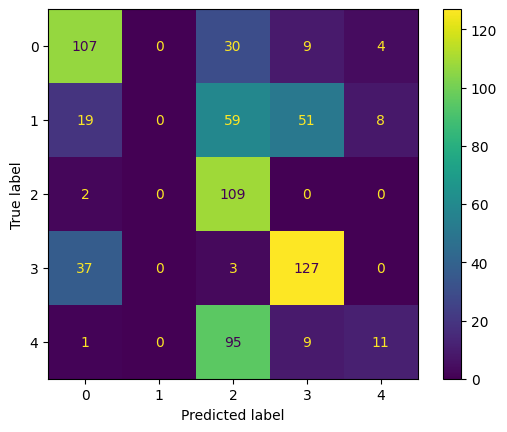

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()


In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


NameError: ignored

In [ ]:
accuracy = (cm.diagonal().sum() / cm.sum()) * 100
print('Accuracy is',accuracy)
K.clear_session()

#### **VGG**

In [ ]:
NUM_FRAMES = 100
average_probs = []
def predict_video(video_path):
    # Open the video and get its properties   
    video = cv2.VideoCapture (video_path)
    
    fps = video.get (cv2.CAP_PROP_FPS)
    num_frames_video = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the frames to extract
    frame_idxs = np.linspace(0, num_frames_video-1, NUM_FRAMES, dtype=int)

    # Create a list to store the probability vectors for each frame
    frame_probs = []

    # Loop over the frames to extract and apply the model
    for cnt, frame_idx in enumerate(frame_idxs):
      # Extract the frame
      video.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
      ret, frame = video.read()
     
      if not ret:
         continue

      # Preprocessing the frame
      frame = cv2.resize(frame, (224, 224))
      frame = cv2.cvtColor (frame, cv2.COLOR_BGR2RGB)

      # Apply the model and get the probability vector
      probs = model_vgg.predict(np.expand_dims(frame, axis=0),verbose=0)
      frame_probs.append(probs)
    
    average_prob = np.mean(frame_probs, axis=0)
    # Store the average probability vector for the video
    max_index = np.argmax(average_prob)
    average_probs.append(max_index)


    print(max_index)

    return max_index



In [ ]:
from tqdm import tqdm
videos_folder = "../Data/Sport_Videos/"
y_true = []
y_pred_vgg = []
paths = []

video_list_dir =['BaseballPitch','Basketball','Fencing','TennisSwing','VolleyballSpiking']
for ind,video_file in enumerate(video_list_dir):
  video_paths = [os.path.join(videos_folder,video_file, file_name) for file_name in os.listdir(os.path.join(videos_folder,video_file))]
 
  for path in tqdm(video_paths):
      prediction = predict_video(path)
      y_true.append(ind)
      y_pred_vgg.append(prediction)
      

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_vgg)
print(report)


In [ ]:
accuracy_vgg = (cm.diagonal().sum() / cm.sum()) * 100
print('Accuracy is',accuracy_vgg)
K.clear_session()

#### **EfficientB0**

In [ ]:
NUM_FRAMES = 100
average_probs = []
def predict_video(video_path):
    # Open the video and get its properties   
    video = cv2.VideoCapture (video_path)
    
    fps = video.get (cv2.CAP_PROP_FPS)
    num_frames_video = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the frames to extract
    frame_idxs = np.linspace(0, num_frames_video-1, NUM_FRAMES, dtype=int)

    # Create a list to store the probability vectors for each frame
    frame_probs = []

    # Loop over the frames to extract and apply the model
    for cnt, frame_idx in enumerate(frame_idxs):
      # Extract the frame
      video.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
      ret, frame = video.read()
     
      if not ret:
         continue

      # Preprocessing the frame
      frame = cv2.resize(frame, (224, 224))
      frame = cv2.cvtColor (frame, cv2.COLOR_BGR2RGB)

      # Apply the model and get the probability vector
      probs = model_b0.predict(np.expand_dims(frame, axis=0),verbose=0)
      frame_probs.append(probs)
    
    average_prob = np.mean(frame_probs, axis=0)
    # Store the average probability vector for the video
    max_index = np.argmax(average_prob)
    average_probs.append(max_index)


    print(max_index)

    return max_index



In [ ]:
from tqdm import tqdm
videos_folder = "../Data/Sport_Videos/"
y_true = []
y_pred_b0 = []
paths = []

video_list_dir =['BaseballPitch','Basketball','Fencing','TennisSwing','VolleyballSpiking']
for ind,video_file in enumerate(video_list_dir):
  video_paths = [os.path.join(videos_folder,video_file, file_name) for file_name in os.listdir(os.path.join(videos_folder,video_file))]
 
  for path in tqdm(video_paths):
      prediction = predict_video(path)
      y_true.append(ind)
      y_pred_b0.append(prediction)
      

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred_b0)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_b0)
print(report)


In [ ]:
accuracy_vgg = (cm.diagonal().sum() / cm.sum()) * 100
print('Accuracy is',accuracy_b0)